<a href="https://colab.research.google.com/github/Johnny880724/AFSA_material/blob/main/Fishs_on_materials.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Generate random potential function

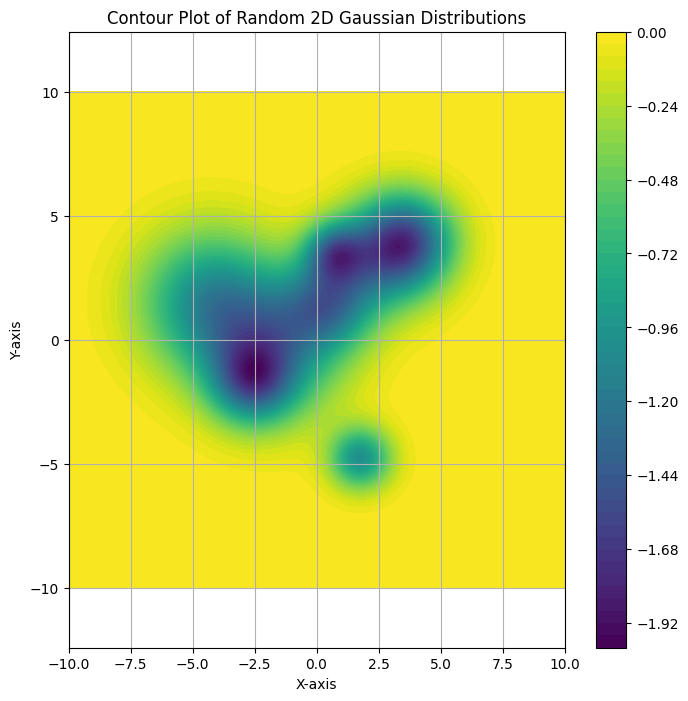

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 參數設定
num_gaussians = 8  # 要生成的高斯函數數量
x = np.linspace(-10, 10, 400)
y = np.linspace(-10, 10, 400)
X, Y = np.meshgrid(x, y)
Z = np.zeros_like(X)

std_dev_range = (0.5, 2.0)  # 隨機標準差的範圍

# 隨機生成高斯位能井的均值位置和標準差
mean_x = np.random.uniform(-5, 5, num_gaussians)  # 隨機均值 x
mean_y = np.random.uniform(-5, 5, num_gaussians)  # 隨機均值 y
std_devs = np.random.uniform(*std_dev_range, num_gaussians)  # 隨機標準差
means = np.column_stack((mean_x, mean_y))  # 將 mean_x 和 mean_y 組合成 means

# Calculate the potential wells (negative Z values)
for i, mean in enumerate(means):
    Z -= np.exp(-0.5 * ((X - mean[0]) ** 2 + (Y - mean[1]) ** 2) / (std_devs[i] ** 2))

# 繪製等高線圖
plt.figure(figsize=(8, 8))
contour = plt.contourf(X, Y, Z, levels=50, cmap='viridis')
plt.colorbar(contour)  # 添加顏色條

# 添加標題和標籤
plt.title('Contour Plot of Random 2D Gaussian Distributions')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.axis('equal')
plt.grid()
plt.show()

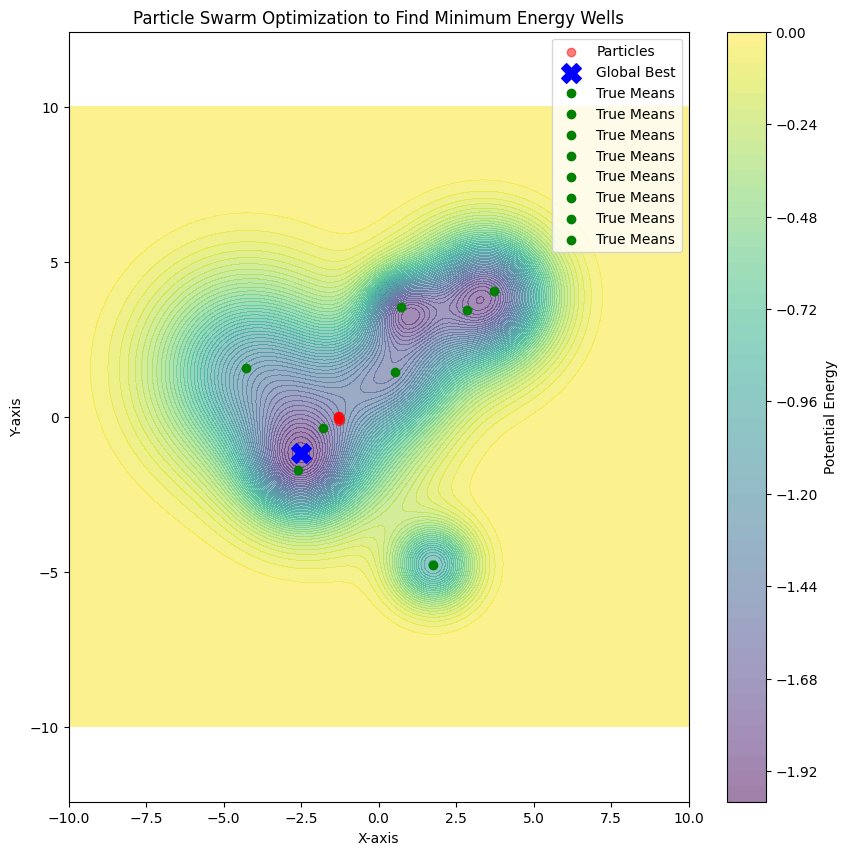

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# 粒子群參數
num_particles = 30  # 粒子數量
max_iterations = 100  # 最大迭代次數
w = 0.5  # 慣性權重
c1 = 1.5  # 自我吸引力
c2 = 1.5  # 群體吸引力
boundary_min = -10  # 邊界最小值
boundary_max = 10   # 邊界最大值
max_velocity = 1.0  # 最大速度
penalty_factor = 100  # 懲罰因子

# 初始化粒子位置和速度
particles = np.random.uniform(boundary_min, boundary_max, (num_particles, 2))
velocities = np.random.uniform(-0.5, 0.5, (num_particles, 2))  # 降低初始速度範圍

# 追蹤最佳位置
p_best = particles.copy()
p_best_scores = np.full(num_particles, np.inf)
g_best = None
g_best_score = np.inf

# 定義目標函數（尋找最低值）
def objective_function(particle, means, std_devs):
    total_score = 0
    for i, mean in enumerate(means):
        distance = np.linalg.norm(particle - mean)
        score = np.exp(-0.5 * (distance / std_devs[i]) ** 2)
        total_score += score

    # 如果粒子不在任何位能井範圍內，給予懲罰
    if total_score == 0:
        return penalty_factor
    return -total_score  # 反轉，確保低位能是高分

# PSO 主循環
for iteration in range(max_iterations):
    for i in range(num_particles):
        score = objective_function(particles[i], means, std_devs)

        # 更新個體最佳
        if score < p_best_scores[i]:
            p_best_scores[i] = score
            p_best[i] = particles[i]

    # 更新全局最佳
    g_best_index = np.argmin(p_best_scores)
    g_best = p_best[g_best_index]

    # 更新粒子速度和位置
    r1, r2 = np.random.rand(2)
    velocities = (w * velocities +
                  c1 * r1 * (p_best - particles) +
                  c2 * r2 * (g_best - particles))

    # 限制最大速度
    velocities = np.clip(velocities, -max_velocity, max_velocity)

    particles += velocities

    # 修正粒子位置，確保在邊界內，並反彈
    out_of_bounds = (particles < boundary_min) | (particles > boundary_max)
    for j in range(num_particles):
        if out_of_bounds[j, 0]:
            particles[j, 0] = boundary_min if particles[j, 0] < boundary_min else boundary_max
            velocities[j, 0] *= -0.5  # 反彈並減速
        if out_of_bounds[j, 1]:
            particles[j, 1] = boundary_min if particles[j, 1] < boundary_min else boundary_max
            velocities[j, 1] *= -0.5  # 反彈並減速

    # 重新計算 g_best 以確保在邊界內
    valid_particles = particles[np.all((particles >= boundary_min) & (particles <= boundary_max), axis=1)]
    if valid_particles.size > 0:
        g_best = valid_particles[np.argmin([objective_function(p, means, std_devs) for p in valid_particles])]
    else:
        g_best = None  # 如果所有粒子都在邊界外，則設置為 None

# 繪製結果
plt.figure(figsize=(10, 10))

# 繪製高斯位能井
x = np.linspace(-10, 10, 400)
y = np.linspace(-10, 10, 400)
X, Y = np.meshgrid(x, y)
Z = np.zeros_like(X)

for i, mean in enumerate(means):
    Z += np.exp(-0.5 * ((X - mean[0]) ** 2 + (Y - mean[1]) ** 2) / (std_devs[i] ** 2))

plt.contourf(X, Y, -Z, levels=50, cmap='viridis', alpha=0.5)  # 反轉 Z 值
plt.colorbar(label='Potential Energy')

# 繪製粒子位置
plt.scatter(particles[:, 0], particles[:, 1], color='red', label='Particles', alpha=0.5)
if g_best is not None:
    plt.scatter(g_best[0], g_best[1], color='blue', label='Global Best', marker='X', s=200)

# 繪製均值位置
for mean in means:
    plt.scatter(mean[0], mean[1], color='green', marker='o', label='True Means')

plt.title('Particle Swarm Optimization to Find Minimum Energy Wells')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.axis('equal')
plt.show()


Find most of local minimum

<ipython-input-10-3735dfc7237f>:67: RuntimeWarning: invalid value encountered in divide
  velocities[j] += direction / distance * 5  # Stronger avoidance force
<ipython-input-10-3735dfc7237f>:81: RuntimeWarning: invalid value encountered in divide
  velocities[j] += direction / np.linalg.norm(direction) * 2  # Push away from g_best


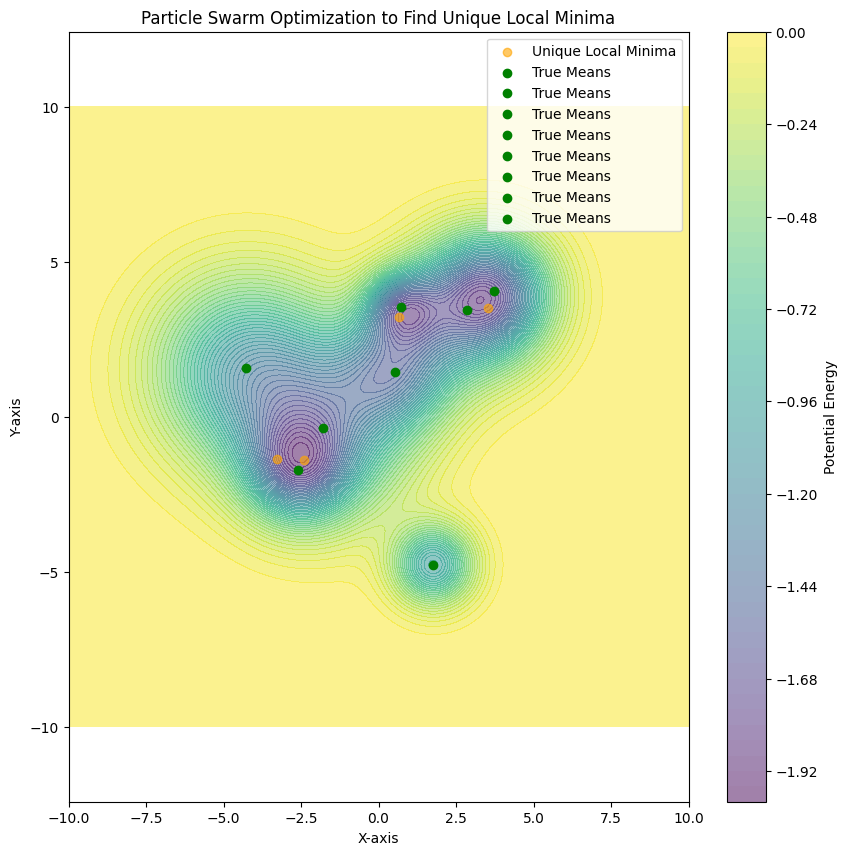

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Particle swarm parameters
num_particles = 30  # Increase the number of fish
max_iterations = 50  # Increase number of iterations for better exploration
w = 0.3  # Decrease inertia weight
c1 = 0.2  # Decrease the influence of personal best position
c2 = 1.5  # Increase the attraction to the global best position
max_velocity = 2.0  # Maximum swimming speed of the fish
penalty_factor = 100  # Penalty for being in undesirable positions

# Initialize fish positions randomly within bounds to ensure good distribution
particles = np.random.uniform(-10, 10, (num_particles, 2))

# Initialize the swimming speed of the fish
velocities = np.random.uniform(-1, 1, (num_particles, 2))

# Track the best positions found by the fish
p_best = particles.copy()
p_best_scores = np.full(num_particles, np.inf)
local_minima = []

# Objective function that calculates the score based on the distance from potential wells
def objective_function(particle, means, std_devs):
    total_score = 0
    for i, mean in enumerate(means):
        distance = np.linalg.norm(particle - mean)  # Calculate distance to the well
        score = np.exp(-0.5 * (distance / std_devs[i]) ** 2)  # Score based on distance
        total_score += score

    if total_score == 0:
        return penalty_factor  # Fish should avoid this area
    return -total_score  # The goal is to minimize this score

# Repeat the search for local minima
for _ in range(6):  # Repeat 6 times to explore
    # PSO main loop where fish search for food (local minima)
    for iteration in range(max_iterations):
        for i in range(num_particles):
            score = objective_function(particles[i], means, std_devs)

            # Update the best position for each fish based on its score
            if score < p_best_scores[i]:
                p_best_scores[i] = score
                p_best[i] = particles[i]

        # Update the global best position based on all fish
        g_best_index = np.argmin(p_best_scores)
        g_best = p_best[g_best_index]

        # Record the current lowest point found by the school of fish
        local_minima.append(g_best)

        # Update the swimming speed and position of the fish
        r1, r2 = np.random.rand(2)
        velocities = (w * velocities +
                      c1 * r1 * (p_best - particles) +
                      c2 * r2 * (g_best - particles) * 0.1)  # Moderate attraction to g_best

        # Avoid already found lowest points (local minima)
        for j in range(num_particles):
            for min_point in local_minima:
                distance = np.linalg.norm(particles[j] - min_point)
                if distance < 4.0:  # If too close to a local minimum
                    direction = particles[j] - min_point  # Fish swims away from the well
                    velocities[j] += direction / distance * 5  # Stronger avoidance force

        # Ensure fish don't overlap; if they get too close, they swim apart
        for j in range(num_particles):
            for k in range(j + 1, num_particles):
                distance = np.linalg.norm(particles[j] - particles[k])
                if distance < 1.0:  # If two fish are too close
                    direction = particles[j] - particles[k]  # Swim away from each other
                    velocities[j] += direction / distance * 2

        # Introduce a repulsion from the global best position to encourage exploration
        if np.min(np.linalg.norm(particles - g_best, axis=1)) < 2.0:
            for j in range(num_particles):
                direction = particles[j] - g_best
                velocities[j] += direction / np.linalg.norm(direction) * 2  # Push away from g_best

        velocities = np.clip(velocities, -max_velocity, max_velocity)  # Limit swimming speed
        particles += velocities + np.random.uniform(-1, 1, particles.shape)  # Introduce random disturbances

    # Allow the fish to slightly explore other areas
    particles += np.random.uniform(-3, 3, particles.shape)  # Fish can wander a bit

# Remove duplicates from the found local minima
unique_minima = np.unique(local_minima, axis=0)

# Plotting the results
plt.figure(figsize=(10, 10))



plt.contourf(X, Y, -Z, levels=50, cmap='viridis', alpha=0.5)
plt.colorbar(label='Potential Energy')

# Plot the positions of the fish
#plt.scatter(particles[:, 0], particles[:, 1], color='red', label='Fish (Particles)', alpha=0.5)

# Plot unique local minima
if unique_minima.size > 0:
    plt.scatter(unique_minima[:, 0], unique_minima[:, 1], color='orange', label='Unique Local Minima', marker='o', alpha=0.6)

# Plot the true mean positions of the wells
for mean in means:
    plt.scatter(mean[0], mean[1], color='green', marker='o', label='True Means')

plt.title('Particle Swarm Optimization to Find Unique Local Minima')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.axis('equal')
plt.show()


# Gradient Descent

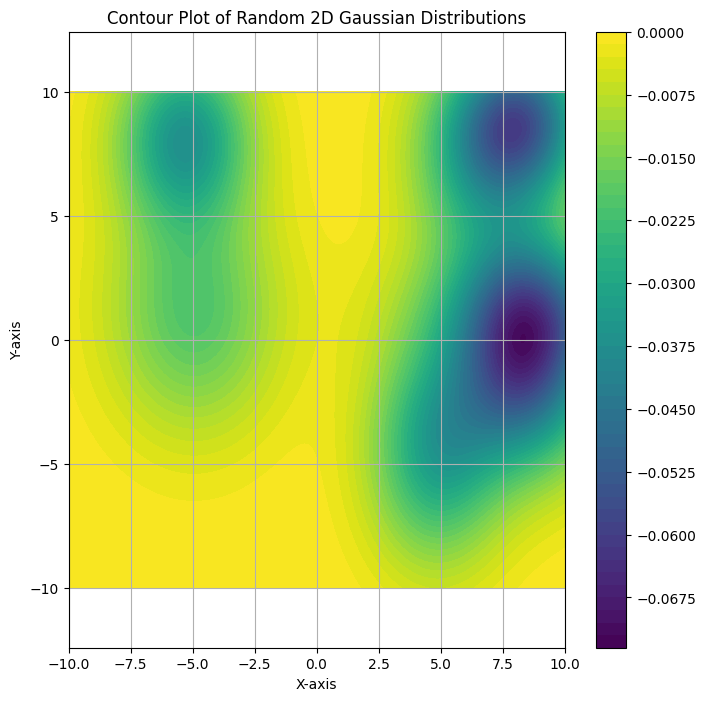

Iteration 0, x = -0.1000, y = 0.1000, Z = -0.0030
Iteration 100, x = -4.9402, y = 1.7650, Z = -0.0209
Iteration 200, x = -4.9684, y = 1.7767, Z = -0.0209
Iteration 300, x = -4.9685, y = 1.7767, Z = -0.0209
Iteration 400, x = -4.9684, y = 1.7767, Z = -0.0209
Iteration 500, x = -4.9684, y = 1.7767, Z = -0.0209
Iteration 600, x = -4.9684, y = 1.7767, Z = -0.0209
Iteration 700, x = -4.9684, y = 1.7767, Z = -0.0209
Iteration 800, x = -4.9684, y = 1.7767, Z = -0.0209
Iteration 900, x = -4.9684, y = 1.7767, Z = -0.0209
Optimized x: -4.9684
Optimized y: 1.7767
Minimum Z: -0.0209


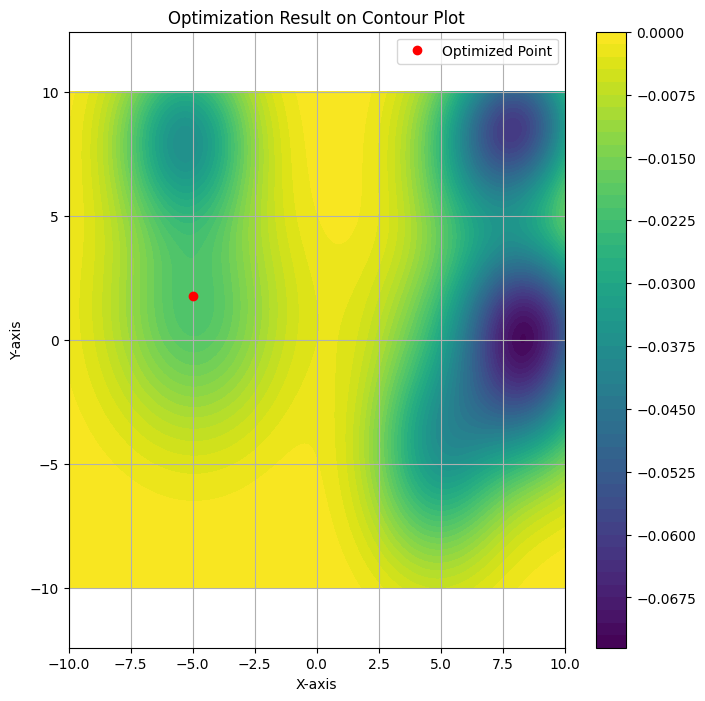

In [4]:
import torch

# Parameters
num_gaussians = 8  # Number of Gaussian functions
x_grid = np.linspace(-10, 10, 400)
y_grid = np.linspace(-10, 10, 400)
X_grid, Y_grid = np.meshgrid(x_grid, y_grid)

# Initialize Z grid
Z_grid = np.zeros_like(X_grid)

# Store Gaussian parameters
params = []

# Compute Z over the grid and store parameters
for _ in range(num_gaussians):
    mean_x = np.random.uniform(-10, 10)  # Random mean x
    mean_y = np.random.uniform(-10, 10)  # Random mean y
    std_dev_x = np.random.uniform(1.5, 3.5)  # Random std dev x
    std_dev_y = np.random.uniform(1.5, 3.5)  # Random std dev y

    # Store parameters
    params.append((mean_x, mean_y, std_dev_x, std_dev_y))

    # 2D Gaussian function
    Z_grid -= (1 / (2 * np.pi * std_dev_x * std_dev_y)) * \
         np.exp(-0.5 * (((X_grid - mean_x) ** 2 / std_dev_x ** 2) +
                        ((Y_grid - mean_y) ** 2 / std_dev_y ** 2)))

# Plot the contour of Z
plt.figure(figsize=(8, 8))
contour = plt.contourf(X_grid, Y_grid, Z_grid, levels=50, cmap='viridis')
plt.colorbar(contour)
plt.title('Contour Plot of Random 2D Gaussian Distributions')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.axis('equal')
plt.grid()
plt.show()

# Convert parameters to PyTorch tensors
params_torch = []
for p in params:
    mean_x, mean_y, std_dev_x, std_dev_y = p
    params_torch.append((
        torch.tensor(mean_x, dtype=torch.float32),
        torch.tensor(mean_y, dtype=torch.float32),
        torch.tensor(std_dev_x, dtype=torch.float32),
        torch.tensor(std_dev_y, dtype=torch.float32)
    ))

# Initialize variables x and y for optimization
x = torch.tensor(0.0, requires_grad=True)
y = torch.tensor(0.0, requires_grad=True)

# Define optimizer
optimizer = torch.optim.Adam([x, y], lr=0.1)

# Optimization loop
num_iterations = 1000
for i in range(num_iterations):
    optimizer.zero_grad()
    Z = 0.0
    for mean_x, mean_y, std_dev_x, std_dev_y in params_torch:
        Z -= (1 / (2 * np.pi * std_dev_x * std_dev_y)) * \
             torch.exp(-0.5 * (((x - mean_x) ** 2 / std_dev_x ** 2) +
                               ((y - mean_y) ** 2 / std_dev_y ** 2)))
    Z.backward()
    optimizer.step()
    if i % 100 == 0:
        print(f"Iteration {i}, x = {x.item():.4f}, y = {y.item():.4f}, Z = {Z.item():.4f}")

# Final optimized values
print(f"Optimized x: {x.item():.4f}")
print(f"Optimized y: {y.item():.4f}")
print(f"Minimum Z: {Z.item():.4f}")

# Plot the optimized point on the contour
plt.figure(figsize=(8, 8))
contour = plt.contourf(X_grid, Y_grid, Z_grid, levels=50, cmap='viridis')
plt.colorbar(contour)
plt.plot(x.item(), y.item(), 'ro', label='Optimized Point')
plt.title('Optimization Result on Contour Plot')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.axis('equal')
plt.grid()
plt.show()
